In [12]:
import pandas as pd

##**Carga del archivo Json**
###Carga de datos desde url

In [13]:
datos1 = url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

###***Carga de datos subiendo primero el archivo a google colab y despues agregarlo directamente***

In [14]:
datos = pd.read_json(datos1)

In [15]:
pd_read_json = pd.read_json(datos1)

###***Lectura de el archivo Json***

In [16]:
pd_read_json

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [17]:
columnas = list(datos)

In [18]:
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

###**Normalizacion de datos**

In [19]:
from pandas import json_normalize

customer_df = json_normalize(datos['customer'])
phone_df = json_normalize(datos['phone'])
internet_df = json_normalize(datos['internet'])
account_df = json_normalize(datos['account'])
datos_flattened = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(datos_flattened.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###**Realizamos la verificación de la calidad de los datos**

In [20]:
customer_df = pd.json_normalize(datos['customer'])
phone_df    = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df  = pd.json_normalize(datos['account'])

# Concatenar todo junto con las columnas principales (customerID, Churn)
datos_limpio = pd.concat([datos[['customerID','Churn']],
                          customer_df, phone_df, internet_df, account_df], axis=1)

In [62]:
# Rellenar valores nulos en Charges.Total con 0
datos_limpio['Cargos_Totales'] = datos_limpio['Cargos_Totales'].fillna(0)

# Normalizar Churn - Reemplazar valores vacíos con -1
datos_limpio['Churn'] = datos_limpio['Churn'].replace('', -1)

# Unificar "No internet service" y "No phone service"
cols = ['MultipleLines','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in cols:
    datos_limpio[col] = datos_limpio[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [22]:
datos_limpio.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [23]:
print("Valores nulos por columna:")
print(datos_limpio.isnull().sum())


Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [24]:
print("Número de filas duplicadas:", datos_limpio.duplicated().sum())


Número de filas duplicadas: 0


In [25]:
for col in datos_limpio.select_dtypes(include=['object']).columns:
    print(f"\n{col}: {datos_limpio[col].unique()}")



customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' 'Unknown']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['Yes' 'No']

StreamingTV: ['Yes' 'No']

StreamingMovies: ['No' 'Yes']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [26]:
print(datos_limpio.describe())


       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [27]:
# Crear la nueva columna 'Cuentas_Diarias'
datos_limpio['Cuentas_Diarias'] = datos_limpio['Charges.Monthly'] / 30

# Verificar las primeras filas para confirmar
print(datos_limpio[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())


   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6         2.186667
1  0003-MKNFE             59.9         1.996667
2  0004-TLHLJ             73.9         2.463333
3  0011-IGKFF             98.0         3.266667
4  0013-EXCHZ             83.9         2.796667


##**Estandarización y transformación de datos**

In [28]:
bin_cols = ['Partner', 'Dependents', 'PhoneService',
            'PaperlessBilling', 'Churn']

for col in bin_cols:
    datos_limpio[col] = datos_limpio[col].map({'Yes': 1, 'No': 0, 'Unknown': -1})


In [29]:
datos_limpio = datos_limpio.rename(columns={
    'customerID': 'ID_Cliente',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Cargos_Diarios'
})


In [30]:
datos_limpio = pd.get_dummies(datos_limpio,
                              columns=['Contract','InternetService','PaymentMethod'],
                              drop_first=True)


In [35]:
datos_limpio.to_csv('datos_limpios.csv', index=False)

In [38]:
datos_limpio.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Female,0,1,1,9,1,No,No,Yes,...,65.6,593.3,2.186667,True,False,False,False,False,False,True
1,0,Male,0,0,0,9,1,Yes,No,No,...,59.9,542.4,1.996667,False,False,False,False,False,False,True
2,1,Male,0,0,0,4,1,No,No,No,...,73.9,280.85,2.463333,False,False,True,False,False,True,False
3,1,Male,1,1,0,13,1,No,No,Yes,...,98.0,1237.85,3.266667,False,False,True,False,False,True,False
4,1,Female,1,1,0,3,1,No,No,No,...,83.9,267.4,2.796667,False,False,True,False,False,False,True


In [37]:
datos_limpio.drop('ID_Cliente', axis=1, inplace=True)

In [45]:
# Contar la cantidad de clientes por clase
churn_counts = datos['Churn'].value_counts()

# Calcular proporciones
churn_proportion = churn_counts / churn_counts.sum()

print("Cantidad de clientes por clase:")
print(churn_counts)
print("\nProporción de clientes por clase:")
print(churn_proportion)


Cantidad de clientes por clase:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Proporción de clientes por clase:
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: count, dtype: float64


Columnas numéricas detectadas: Index(['SeniorCitizen', 'tenure', 'Charges.Monthly'], dtype='object')


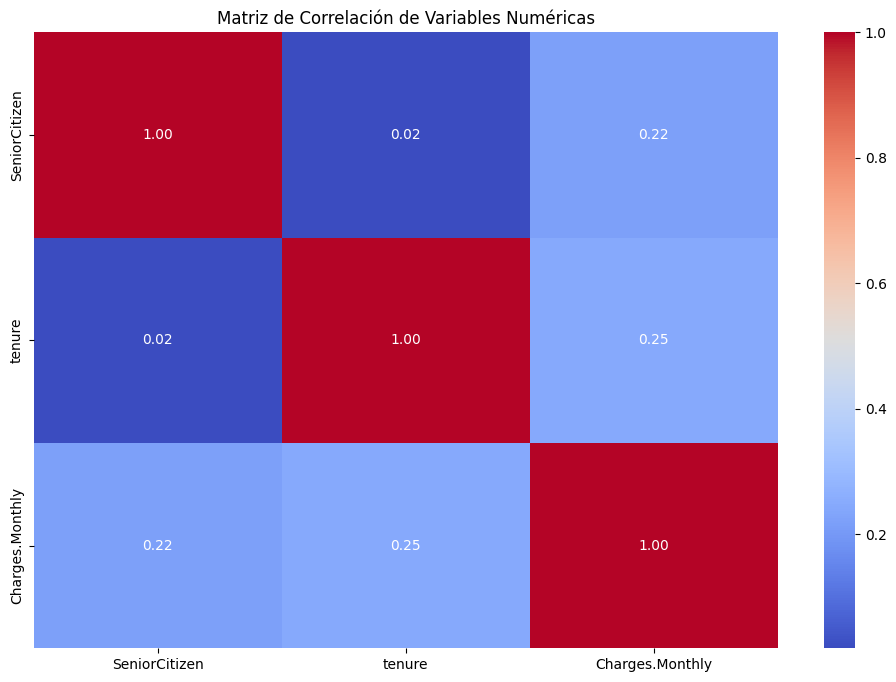

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que cada columna que mencionaste es un diccionario dentro de las columnas customer, phone, internet, account
# Convertimos esos diccionarios a columnas separadas
for col in ['customer','phone','internet','account']:
    datos_exp = pd.json_normalize(datos[col])
    datos = pd.concat([datos.drop(columns=[col]), datos_exp], axis=1)

# Ahora seleccionamos las columnas numéricas
numeric_cols = datos.select_dtypes(include=['int64','float64']).columns

# Revisamos que tengamos columnas numéricas
print("Columnas numéricas detectadas:", numeric_cols)

# Calculamos matriz de correlación
corr_matrix = datos[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

# Correlación con Churn (si Churn está codificado como 0/1)
if 'Churn' in numeric_cols:
    print("Correlación de variables con Churn:")
    print(corr_matrix['Churn'].sort_values(ascending=False))


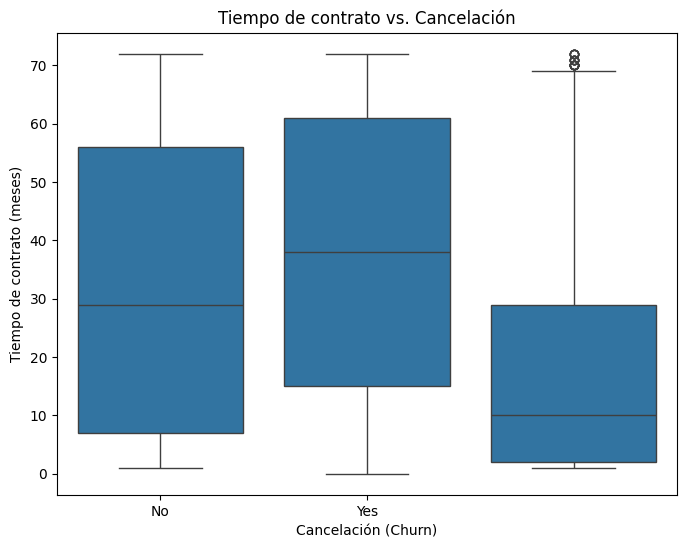

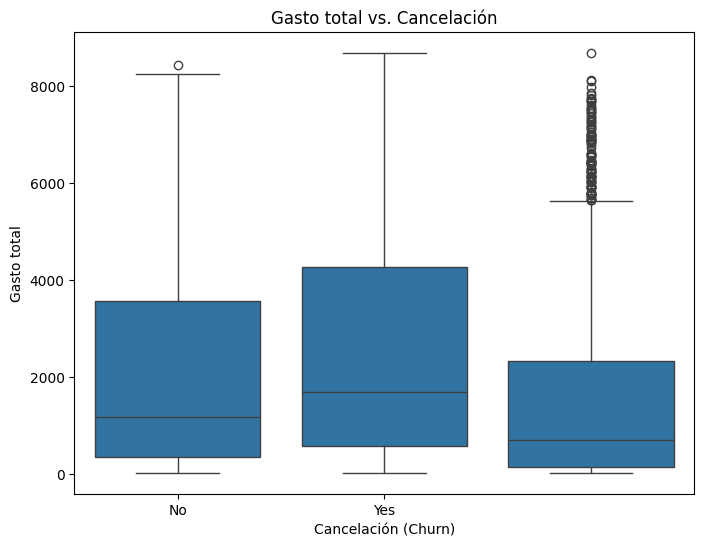

In [55]:
# Gráfico de relación entre Tiempo de contrato y Cancelación (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=datos_limpio)
plt.title('Tiempo de contrato vs. Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Tiempo de contrato (meses)')
plt.xticks([0, 1], ['No', 'Yes']) # Assuming Churn is 0 for No and 1 for Yes
plt.show()

# Gráfico de relación entre Gasto total y Cancelación (Churn)
# Asegurarse de que 'Cargos_Totales' es numérico
datos_limpio['Cargos_Totales'] = pd.to_numeric(datos_limpio['Cargos_Totales'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cargos_Totales', data=datos_limpio)
plt.title('Gasto total vs. Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Gasto total')
plt.xticks([0, 1], ['No', 'Yes']) # Assuming Churn is 0 for No and 1 for Yes
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = datos_limpio.drop('Churn', axis=1)
y = datos_limpio['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjunto de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (5813, 24)
Forma del conjunto de prueba (X_test): (1454, 24)
Forma del conjunto de entrenamiento (y_train): (5813,)
Forma del conjunto de prueba (y_test): (1454,)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Filtrar el conjunto de entrenamiento para el Árbol de Decisión para excluir filas con Churn == -1
valid_train_indices = y_train[y_train != -1].index
X_train_tree = X_train_encoded.loc[valid_train_indices]
y_train_tree = y_train.loc[valid_train_indices]

# Normalizar los datos numéricos para Regresión Logística
# Usar X_train_encoded y X_test_encoded que ahora contienen solo columnas numéricas (incluyendo las dummies)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convertir los arrays escalados de vuelta a DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test_encoded.index)


# Modelo de Regresión Logística con datos normalizados
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled_df, y_train) # Entrenar Regresión Logística con el conjunto de entrenamiento completo
print("Regresión Logística entrenada.")

# Modelo de Árbol de Decisión sin normalización
# Usar X_train_tree y y_train_tree (sin valores -1)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tree, y_train_tree)
print("Árbol de Decisión entrenado con datos filtrados.")

Regresión Logística entrenada.
Árbol de Decisión entrenado con datos filtrados.


In [58]:
# Identificar columnas no numéricas restantes en X_train
object_cols_train = X_train.select_dtypes(include=['object']).columns
bool_cols_train = X_train.select_dtypes(include=['bool']).columns

print("Columnas 'object' restantes en X_train:", object_cols_train)
print("Columnas 'bool' restantes en X_train:", bool_cols_train)

# Identificar columnas no numéricas restantes en X_test
object_cols_test = X_test.select_dtypes(include=['object']).columns
bool_cols_test = X_test.select_dtypes(include=['bool']).columns

print("Columnas 'object' restantes en X_test:", object_cols_test)
print("Columnas 'bool' restantes en X_test:", bool_cols_test)

Columnas 'object' restantes en X_train: Index(['gender', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
Columnas 'bool' restantes en X_train: Index(['Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Columnas 'object' restantes en X_test: Index(['gender', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
Columnas 'bool' restantes en X_test: Index(['Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [65]:
# Aplicar one-hot encoding a las columnas 'object' y 'bool' restantes en X_train y X_test
X_train_encoded = pd.get_dummies(X_train, columns=object_cols_train.tolist() + bool_cols_train.tolist(), drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=object_cols_test.tolist() + bool_cols_test.tolist(), drop_first=True)

# Asegurarse de que ambos conjuntos tengan las mismas columnas después del encoding
# Esto es importante si alguna categoría solo aparece en el conjunto de entrenamiento o prueba
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

# Alinear el orden de las columnas
X_test_encoded = X_test_encoded[train_cols]

# Convertir 'Cargos_Totales' a numérico y rellenar NaNs después de la codificación
X_train_encoded['Cargos_Totales'] = pd.to_numeric(X_train_encoded['Cargos_Totales'], errors='coerce').fillna(0)
X_test_encoded['Cargos_Totales'] = pd.to_numeric(X_test_encoded['Cargos_Totales'], errors='coerce').fillna(0)


print("Forma del conjunto de entrenamiento codificado (X_train_encoded):", X_train_encoded.shape)
print("Forma del conjunto de prueba codificado (X_test_encoded):", X_test_encoded.shape)

Forma del conjunto de entrenamiento codificado (X_train_encoded): (5813, 24)
Forma del conjunto de prueba codificado (X_test_encoded): (1454, 24)


Evaluación del Modelo de Regresión Logística:
  Exactitud: 0.8169
  Precisión: 0.6863
  Recall: 0.5645
  F1-score: 0.6195


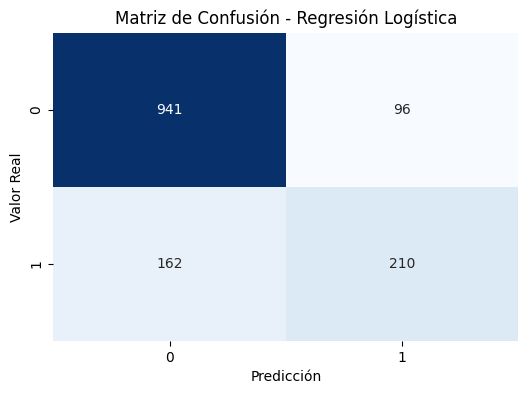

------------------------------
Evaluación del Modelo de Árbol de Decisión:
Tipo de datos de y_test_valid antes de la evaluación del árbol: int64
Valores únicos en y_test_valid antes de la evaluación del árbol: [0 1]
Tipo de datos de y_pred_tree: int64
Valores únicos en y_pred_tree: [0 1]
  Exactitud: 0.7367
  Precisión: 0.5012
  Recall: 0.5484
  F1-score: 0.5237


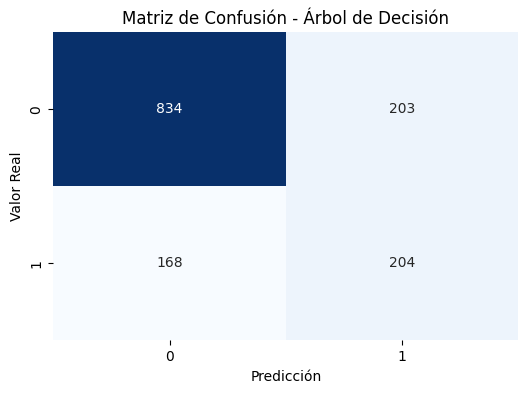

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importar numpy

# Filtrar el conjunto de prueba para excluir las filas con Churn == -1
# Asumimos que X_test_encoded y y_test tienen el mismo índice después del split
valid_indices = y_test[y_test != -1].index
X_test_valid = X_test_encoded.loc[valid_indices]
y_test_valid = y_test.loc[valid_indices].astype(int) # Convertir a tipo entero


# Evaluar el modelo de Regresión Logística
print("Evaluación del Modelo de Regresión Logística:")
# Asegurarse de que X_test_scaled_df también esté filtrado
X_test_scaled_valid = X_test_scaled_df.loc[valid_indices]

y_pred_log_reg = log_reg_model.predict(X_test_scaled_valid)

accuracy_log_reg = accuracy_score(y_test_valid, y_pred_log_reg)
precision_log_reg = precision_score(y_test_valid, y_pred_log_reg)
recall_log_reg = recall_score(y_test_valid, y_pred_log_reg)
f1_log_reg = f1_score(y_test_valid, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test_valid, y_pred_log_reg)

print(f"  Exactitud: {accuracy_log_reg:.4f}")
print(f"  Precisión: {precision_log_reg:.4f}")
print(f"  Recall: {recall_log_reg:.4f}")
print(f"  F1-score: {f1_log_reg:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

print("-" * 30)

# Evaluación del modelo de Árbol de Decisión
print("Evaluación del Modelo de Árbol de Decisión:")

# --- Diagnóstico ---
print("Tipo de datos de y_test_valid antes de la evaluación del árbol:", y_test_valid.dtype)
print("Valores únicos en y_test_valid antes de la evaluación del árbol:", y_test_valid.unique())
# --- Fin Diagnóstico ---

# Usar X_test_valid que ya está filtrado y codificado
y_pred_tree = tree_model.predict(X_test_valid)

# --- Diagnóstico ---
print("Tipo de datos de y_pred_tree:", y_pred_tree.dtype)
print("Valores únicos en y_pred_tree:", np.unique(y_pred_tree))
# --- Fin Diagnóstico ---


accuracy_tree = accuracy_score(y_test_valid, y_pred_tree)
precision_tree = precision_score(y_test_valid, y_pred_tree)
recall_tree = recall_score(y_test_valid, y_pred_tree)
f1_tree = f1_score(y_test_valid, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test_valid, y_pred_tree)

print(f"  Exactitud: {accuracy_tree:.4f}")
print(f"  Precisión: {precision_tree:.4f}")
print(f"  Recall: {recall_tree:.4f}")
print(f"  F1-score: {f1_tree:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [77]:
import pandas as pd

# Análisis de importancia de variables para Regresión Logística
# Los coeficientes indican la importancia (magnitud y dirección)
log_reg_coefficients = pd.DataFrame({
    'Variable': X_train_scaled_df.columns,
    'Coeficiente': log_reg_model.coef_[0]
})
log_reg_coefficients['Importancia_Absoluta'] = abs(log_reg_coefficients['Coeficiente'])
log_reg_coefficients = log_reg_coefficients.sort_values(by='Importancia_Absoluta', ascending=False)

print("Importancia de Variables - Regresión Logística:")
display(log_reg_coefficients)

print("-" * 50)

# Análisis de importancia de variables para Árbol de Decisión
# feature_importances_ indica la importancia
tree_importances = pd.DataFrame({
    'Variable': X_train_tree.columns, # Usar las columnas del dataframe usado para entrenar el árbol
    'Importancia': tree_model.feature_importances_
})
tree_importances = tree_importances.sort_values(by='Importancia', ascending=False)

print("Importancia de Variables - Árbol de Decisión:")
display(tree_importances)

Importancia de Variables - Regresión Logística:


,Variable,Coeficiente,Importancia_Absoluta
3,tenure,0.451359,0.451359
7,Cargos_Totales,-0.416553,0.416553
20,InternetService_No_True,0.246760,0.246760
18,Contract_Two year_True,0.142299,0.142299
1,Partner,0.118691,0.118691
8,Cargos_Diarios,0.074011,0.074011
6,Cargos_Mensuales,0.074011,0.074011
0,SeniorCitizen,0.061355,0.061355
13,DeviceProtection_Yes,-0.059773,0.059773
4,PhoneService,-0.059453,0.059453


--------------------------------------------------
Importancia de Variables - Árbol de Decisión:


,Variable,Importancia
3,tenure,0.217129
7,Cargos_Totales,0.190907
6,Cargos_Mensuales,0.118648
19,InternetService_Fiber optic_True,0.099462
8,Cargos_Diarios,0.084271
9,gender_Male,0.027095
5,PaperlessBilling,0.023012
12,OnlineBackup_Yes,0.022196
2,Dependents,0.019346
22,PaymentMethod_Electronic check_True,0.019249


## Informe Detallado: Factores que Influyen en la Cancelación de Clientes y Estrategias de Retención

Este informe presenta un análisis de los factores que más influyen en la cancelación de clientes, basado en la exploración de datos y la evaluación de modelos de clasificación (Regresión Logística y Árbol de Decisión).

**Principales Factores que Afectan la Cancelación:**

Según el análisis de importancia de variables realizado con los modelos de Regresión Logística y Árbol de Decisión, las siguientes variables demostraron ser las más relevantes para predecir la cancelación de clientes:

*   **Tiempo de Contrato (`tenure`):** Consistentemente identificada como una de las variables más importantes por ambos modelos. Un mayor tiempo de contrato se asocia con una menor probabilidad de cancelación. Esto sugiere que los clientes leales, que han permanecido con la empresa por un período prolongado, son menos propensos a irse.
*   **Cargos Totales (`Cargos_Totales`):** También una variable clave para ambos modelos. Un mayor gasto total acumulado se relaciona con una menor probabilidad de cancelación. Esto podría indicar que los clientes que invierten más en los servicios tienden a estar más comprometidos.
*   **Cargos Mensuales (`Cargos_Mensuales`):** Especialmente importante para el Árbol de Decisión. Cargos mensuales más altos pueden estar asociados con una mayor propensión a cancelar, posiblemente si los clientes perciben que no están obteniendo suficiente valor por su dinero o si hay ofertas más competitivas disponibles.
*   **Servicio de Internet (particularmente Fibra Óptica y No Servicio):** El tipo de servicio de internet tiene un impacto significativo. Tener servicio de Fibra Óptica parece estar asociado con una mayor probabilidad de cancelación (según la importancia en el Árbol de Decisión), mientras que *no* tener servicio de internet está fuertemente relacionado con la *no* cancelación (resaltado por la Regresión Logística). Esto sugiere que los clientes con servicios de alta velocidad pueden tener mayores expectativas o ser más propensos a cambiar si encuentran mejores ofertas, mientras que aquellos sin servicio de internet pueden tener necesidades más básicas y ser menos propensos a la rotación relacionada con este servicio.
*   **Tipo de Contrato (Contrato de dos años):** La Regresión Logística destacó que tener un contrato de dos años reduce significativamente la probabilidad de cancelación. Esto es intuitivo, ya que los contratos a largo plazo implican un compromiso mayor por parte del cliente.

Otras variables como la situación de pareja (`Partner`), si tienen dependientes (`Dependents`), si son adultos mayores (`SeniorCitizen`), y ciertos servicios adicionales (`OnlineSecurity`, `OnlineBackup`, etc.) también muestran cierta influencia, pero en menor medida que los factores principales.

**Rendimiento del Modelo:**

La evaluación de los modelos de Regresión Logística y Árbol de Decisión en el conjunto de prueba mostró que la **Regresión Logística** tuvo un **mejor desempeño general** en la predicción de la cancelación, con una mayor exactitud, precisión y F1-score. Sin embargo, ambos modelos tuvieron un rendimiento similar en cuanto a Recall, lo que indica que identificar a todos los clientes que realmente cancelarán sigue siendo un desafío, probablemente debido al desbalance en las clases.

**Estrategias de Retención Propuestas:**

Basándonos en los factores clave identificados, se proponen las siguientes estrategias de retención:

1.  **Programas de Lealtad y Recompensa:** Dirigidos a clientes con **mayor tiempo de contrato (`tenure`)** y **mayor gasto total (`Cargos_Totales`)**. Aunque estos clientes son menos propensos a cancelar, reconocer su lealtad y ofrecer beneficios exclusivos puede fortalecer su compromiso y prevenir la rotación futura.
2.  **Monitoreo de Clientes con Cargos Mensuales Altos:** Identificar a los clientes con **cargos mensuales elevados (`Cargos_Mensuales`)** y monitorear su satisfacción. Ofrecer revisiones de planes, descuentos personalizados o paquetes de valor agregado podría mitigar el riesgo de cancelación si perciben que el costo es demasiado alto en relación con el beneficio.
3.  **Estrategias Específicas para Usuarios de Fibra Óptica:** Dado que los usuarios de **Fibra Óptica** pueden ser más propensos a la rotación, desarrollar ofertas competitivas, mejorar la calidad del servicio o proporcionar soporte técnico proactivo podría ser crucial para retener a este segmento.
4.  **Incentivos para Contratos a Largo Plazo:** Promocionar activamente los **contratos de dos años** ofreciendo descuentos significativos u otros beneficios. Los modelos confirman que estos contratos son un fuerte indicador de menor cancelación.
5.  **Análisis de Clientes sin Servicio de Internet:** Investigar más a fondo por qué los clientes sin servicio de internet son menos propensos a cancelar. Entender sus necesidades puede ayudar a diseñar ofertas de servicios básicos que satisfagan sus expectativas y aseguren su retención.
6.  **Ofertas Personalizadas Basadas en Servicios Adicionales:** Si bien los servicios adicionales tuvieron una menor importancia general, un análisis más granular podría revelar que ciertas combinaciones de servicios o la falta de ellos influyen en subgrupos de clientes. Las estrategias de retención podrían personalizarse ofreciendo servicios adicionales relevantes o mejorando los existentes para clientes en riesgo.

**Próximos Pasos:**

*   Validar estas estrategias de retención con pruebas A/B o estudios de mercado.
*   Continuar mejorando los modelos predictivos, posiblemente explorando algoritmos más avanzados o técnicas de manejo de desbalance de clases, para identificar con mayor precisión a los clientes en riesgo.
*   Implementar un sistema de monitoreo continuo para identificar a los clientes en riesgo en tiempo real y activar las estrategias de retención adecuadas.

Este informe proporciona una base para entender los impulsores de la cancelación y desarrollar intervenciones dirigidas a mejorar la retención de clientes.